# read label

In [3]:
import pandas as pd

## bounding box

In [4]:
bbox_table = pd.read_csv('/home/jeff/data/nih/archive/BBox_List_2017.csv')

In [5]:
bbox_table

Image Index Finding Label     Bbox [x           y           w  \
0    00013118_008.png   Atelectasis  225.084746  547.019217   86.779661   
1    00014716_007.png   Atelectasis  686.101695  131.543498  185.491525   
2    00029817_009.png   Atelectasis  221.830508  317.053115  155.118644   
3    00014687_001.png   Atelectasis  726.237288  494.951420  141.016949   
4    00017877_001.png   Atelectasis  660.067797  569.780787  200.677966   
..                ...           ...         ...         ...         ...   
979  00029464_015.png   Atelectasis  198.940451  352.900747  615.537778   
980  00025769_001.png   Atelectasis  701.838229  572.491858  103.537778   
981  00016837_002.png   Atelectasis  140.913785  658.962969  271.928889   
982  00020124_003.png   Atelectasis  175.047118  580.456302  244.622222   
983  00026920_000.png   Atelectasis  343.438229  446.198524  120.604444   

             h]  Unnamed: 6  Unnamed: 7  Unnamed: 8  
0     79.186441         NaN         NaN         NaN  
1    313.491525         NaN         NaN         NaN  
2    216.949153         NaN         NaN         NaN  
3     55.322034         NaN         NaN         NaN  
4     78.101695         NaN         NaN         NaN  
..          ...         ...         ...         ...  
979  323.128889         NaN         NaN         NaN  
980   63.715556         NaN         NaN         NaN  
981   94.435556         NaN         NaN         NaN  
982  103.537778         NaN         NaN         NaN  
983   53.475556         NaN         NaN         NaN  

[984 rows x 9 columns]

## 4 bbox values

In [6]:
bbox_table['Bbox [x']

0      225.084746
1      686.101695
2      221.830508
3      726.237288
4      660.067797
          ...    
979    198.940451
980    701.838229
981    140.913785
982    175.047118
983    343.438229
Name: Bbox [x, Length: 984, dtype: float64

In [7]:
bbox_table['y']

0      547.019217
1      131.543498
2      317.053115
3      494.951420
4      569.780787
          ...    
979    352.900747
980    572.491858
981    658.962969
982    580.456302
983    446.198524
Name: y, Length: 984, dtype: float64

In [8]:
bbox_table['w']

0       86.779661
1      185.491525
2      155.118644
3      141.016949
4      200.677966
          ...    
979    615.537778
980    103.537778
981    271.928889
982    244.622222
983    120.604444
Name: w, Length: 984, dtype: float64

In [9]:
bbox_table['h]']

0       79.186441
1      313.491525
2      216.949153
3       55.322034
4       78.101695
          ...    
979    323.128889
980     63.715556
981     94.435556
982    103.537778
983     53.475556
Name: h], Length: 984, dtype: float64

## check how many classes

In [10]:
set(bbox_table['Finding Label'])

{'Atelectasis',
 'Cardiomegaly',
 'Effusion',
 'Infiltrate',
 'Mass',
 'Nodule',
 'Pneumonia',
 'Pneumothorax'}

In [11]:
classes = list(set(bbox_table['Finding Label']))
classes

['Effusion',
 'Mass',
 'Pneumothorax',
 'Atelectasis',
 'Infiltrate',
 'Pneumonia',
 'Cardiomegaly',
 'Nodule']

# count dataset size of each classes

In [12]:
for i in classes:
    print(i)
    print(len(bbox_table[bbox_table['Finding Label'] == i].index))
    print()

Effusion
153

Mass
85

Pneumothorax
98

Atelectasis
180

Infiltrate
123

Pneumonia
120

Cardiomegaly
146

Nodule
79



# get only Nodule data

In [13]:
bbox_table = bbox_table[bbox_table['Finding Label'] == 'Nodule']
print(bbox_table.shape)
bbox_table

(79, 9)


Image Index Finding Label     Bbox [x           y           w  \
668  00001688_000.png        Nodule  667.496296  276.317460  122.446561   
669  00004547_003.png        Nodule  899.386243  690.251852   53.096296   
670  00023078_000.png        Nodule  741.180952  687.001058   52.012698   
671  00023068_003.png        Nodule  351.085714  747.682540   35.758730   
672  00013911_000.png        Nodule  118.112169  483.284656   85.604233   
..                ...           ...         ...         ...         ...   
742  00013674_000.png        Nodule  210.217989  319.661376   58.514286   
743  00013751_003.png        Nodule  676.165079  610.065608   89.938624   
744  00010103_014.png        Nodule  343.500529  412.850794   41.176720   
745  00011576_000.png        Nodule  206.967196  582.975661   46.594709   
746  00030413_003.png        Nodule  255.729101  237.307937   88.855026   

             h]  Unnamed: 6  Unnamed: 7  Unnamed: 8  
668  150.620106         NaN         NaN         NaN  
669   58.514286         NaN         NaN         NaN  
670   48.761905         NaN         NaN         NaN  
671   33.591534         NaN         NaN         NaN  
672  101.858201         NaN         NaN         NaN  
..          ...         ...         ...         ...  
742   57.430688         NaN         NaN         NaN  
743   89.938624         NaN         NaN         NaN  
744   45.511111         NaN         NaN         NaN  
745   41.176720         NaN         NaN         NaN  
746   76.935450         NaN         NaN         NaN  

[79 rows x 9 columns]

# Segmentation LABEL

## show on image

In [35]:
# target image
image_name = bbox_table['Image Index'].iloc[11]

In [36]:
image_name

'00003948_001.png'

In [37]:
# label of the target image
label = bbox_table[bbox_table['Image Index'] == image_name]
label

Image Index Finding Label    Bbox [x           y           w  \
679  00003948_001.png        Nodule  281.73545  305.574603  102.941799   

            h]  Unnamed: 6  Unnamed: 7  Unnamed: 8  
679  127.86455         NaN         NaN         NaN

In [38]:
print(list(label['Bbox [x'])[0])
print(list(label['y'])[0])
print(list(label['w'])[0])
print(list(label['h]'])[0])

281.73544973545
305.574603174603
102.941798941799
127.86455026455


In [39]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2

In [40]:
img = cv2.imread('/home/jeff/data/nih/archive/images/{}'.format(image_name))

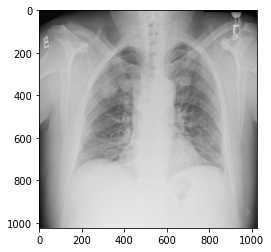

In [41]:
plt.imshow(img)

In [42]:
img.shape

(1024, 1024, 3)

In [43]:
##:                (xy)---------------+
##:                |                  |
##:              height               |
##:                |                  |
##:                +----- width ------+

In [44]:
label_color = ['red', 'blue', 'green', 'orange', 'cyan']

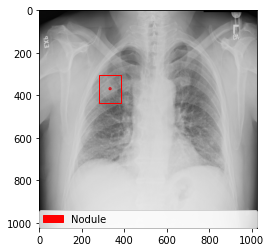

In [45]:
# add label bbox
plt.imshow(img)

ax = plt.gca()

_patches = []

# a image might have many labels
for i in range(len(list(label['y']))):
    rect = patches.Rectangle((list(label['Bbox [x'])[i], list(label['y'])[i]),
                            list(label['w'])[i], list(label['h]'])[i],
                            linewidth=1, edgecolor=label_color[i], fill=False )
    
    # plot center point of bbox
    cent = patches.Circle((list(label['Bbox [x'])[i] + list(label['w'])[0]//2,
                           list(label['y'])[i] + list(label['h]'])[0]//2 ),
                            radius = 5, edgecolor=label_color[i], fill=True )
    
    ax.add_patch(rect)
    ax.add_patch(cent)

    _patches.append(patches.Patch(color=label_color[i], label=list(label['Finding Label'])[i]))
    
plt.legend(handles=_patches, ncol=2, loc='lower left', mode='expand', borderaxespad=0.)

plt.show()

## Show all nodules

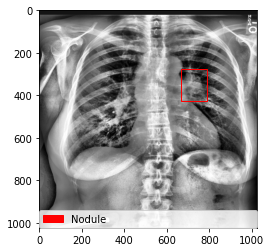

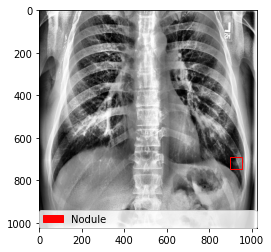

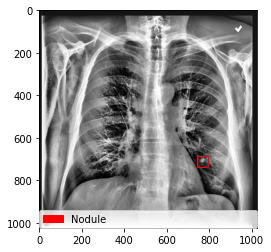

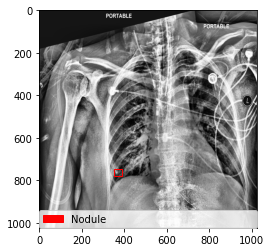

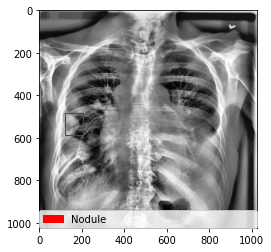

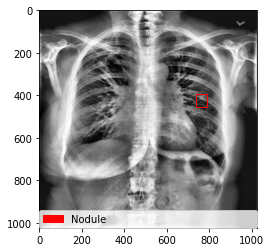

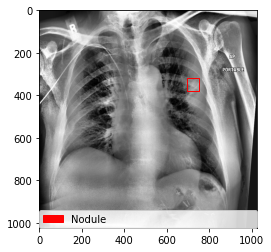

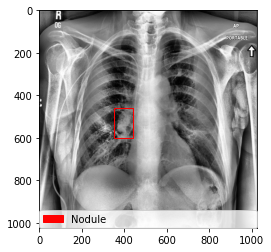

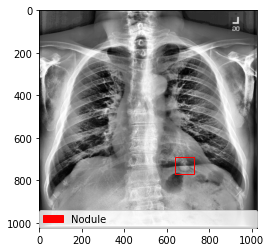

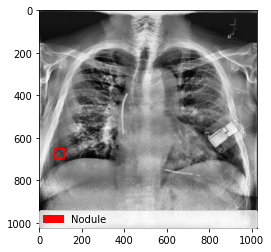

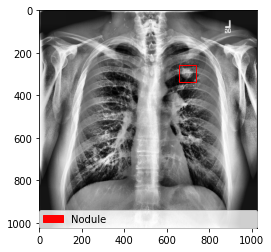

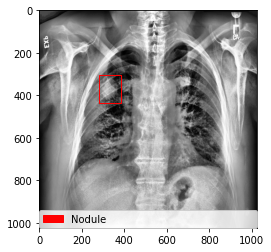

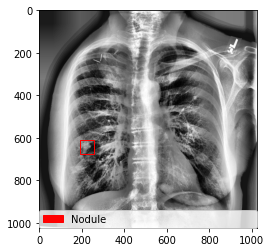

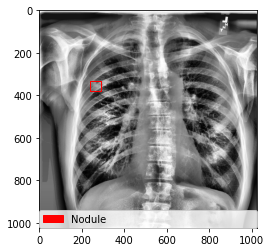

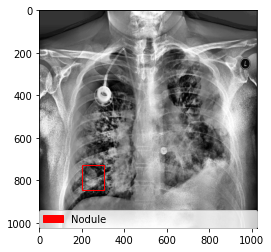

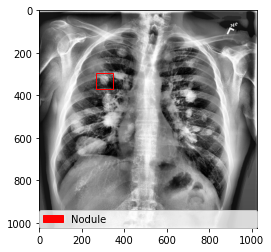

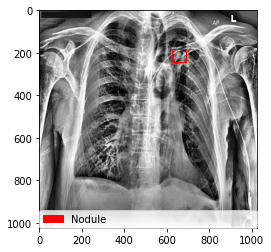

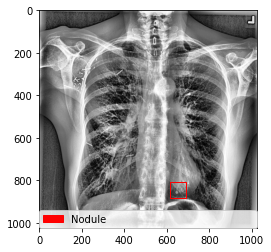

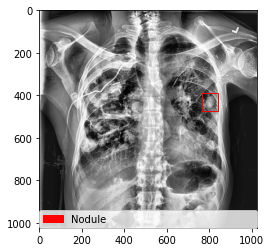

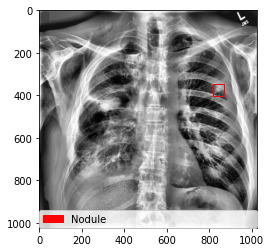

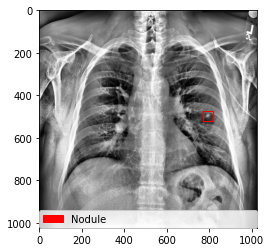

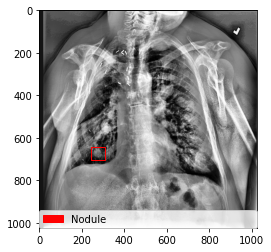

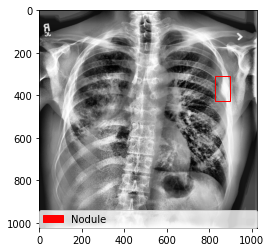

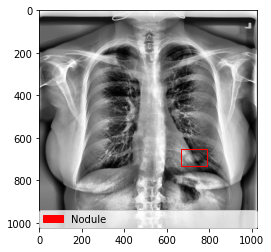

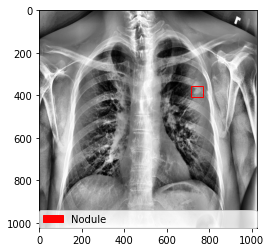

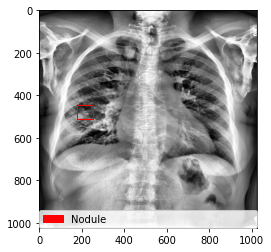

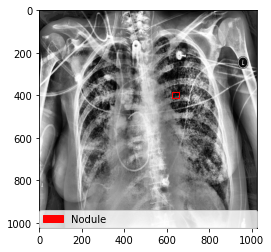

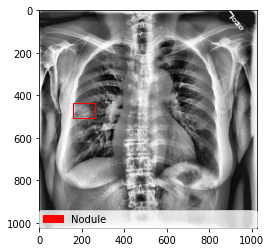

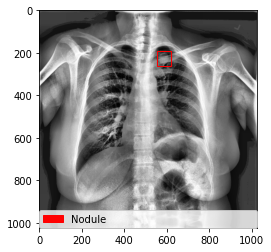

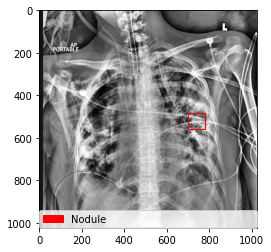

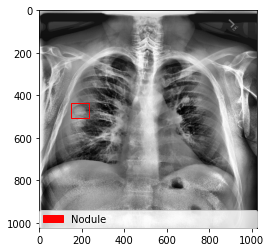

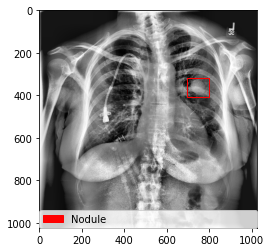

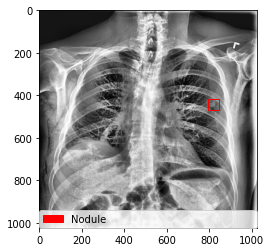

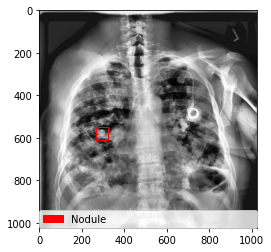

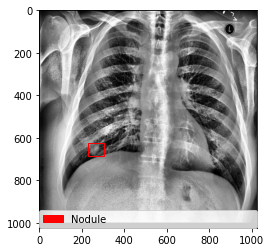

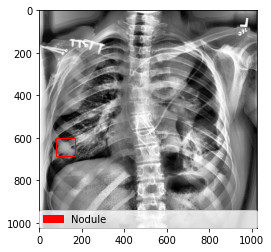

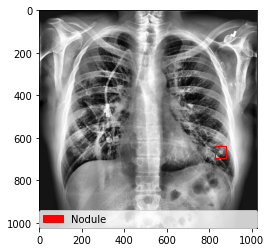

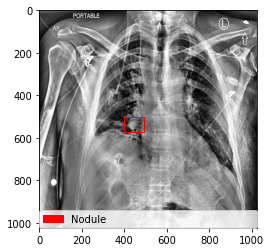

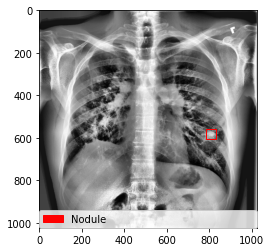

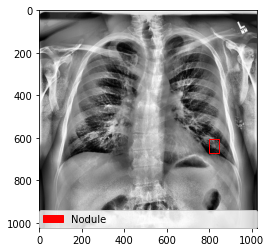

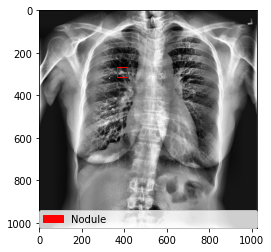

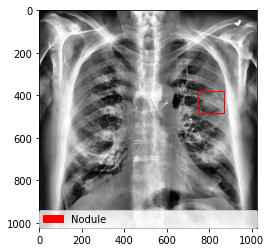

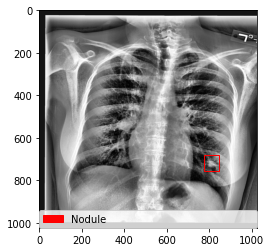

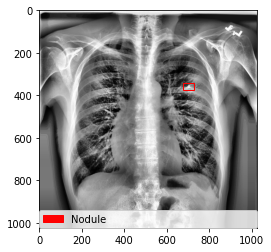

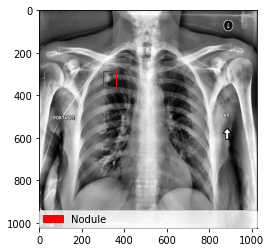

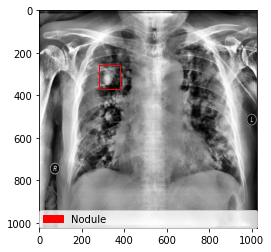

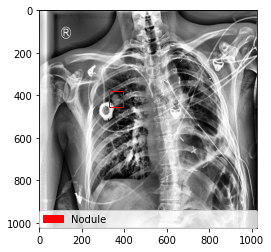

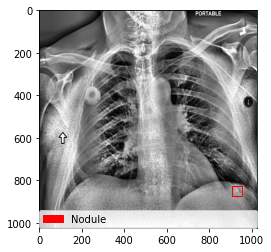

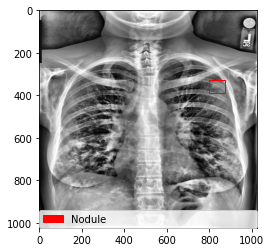

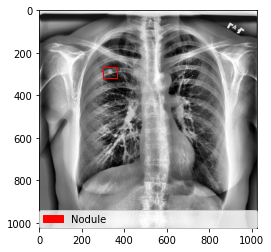

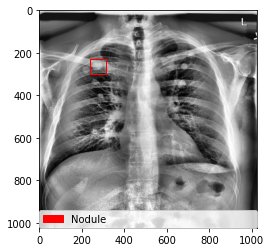

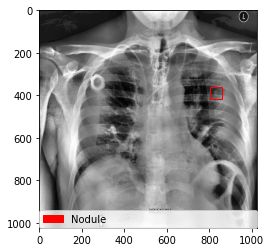

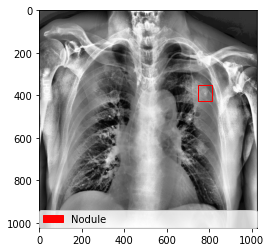

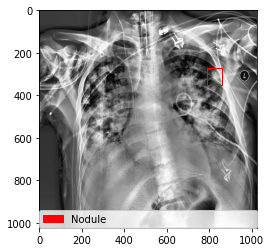

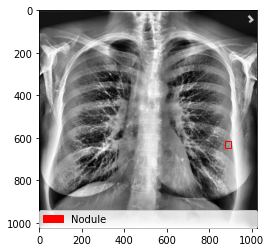

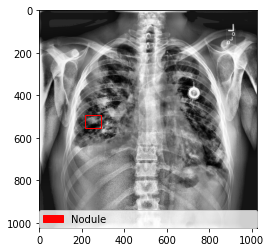

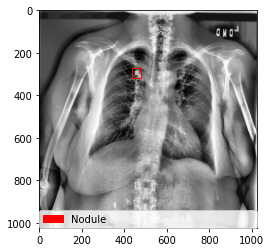

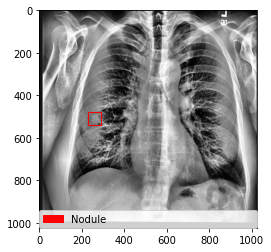

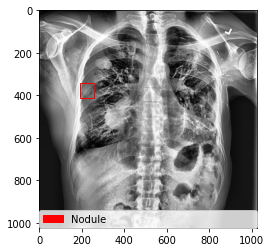

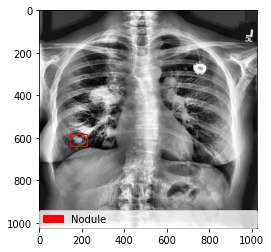

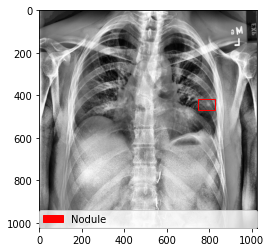

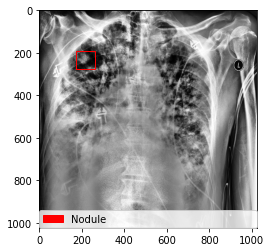

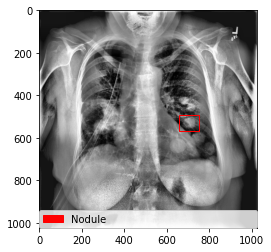

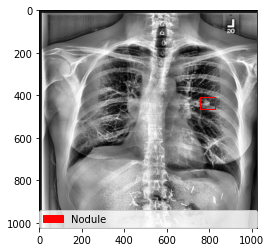

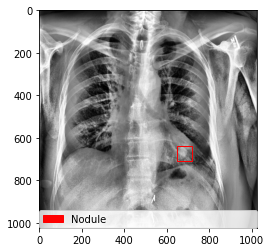

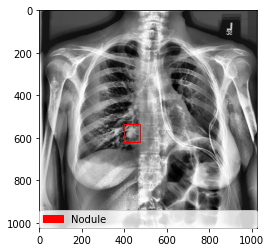

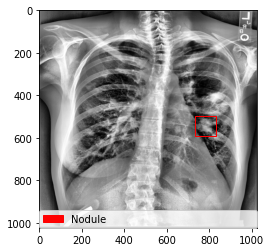

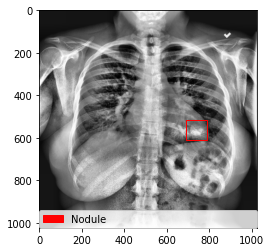

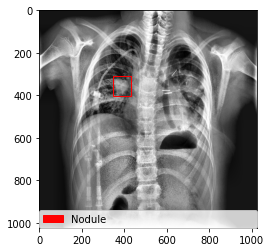

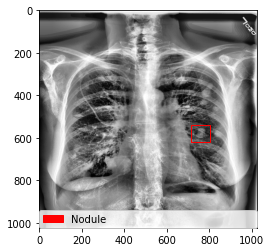

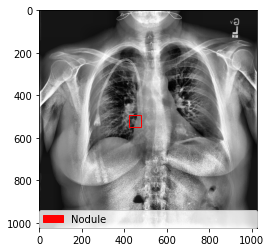

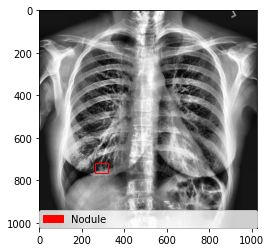

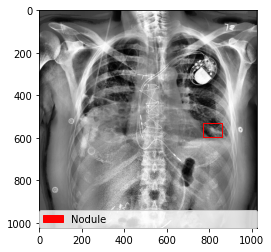

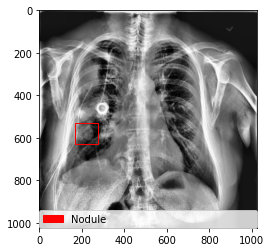

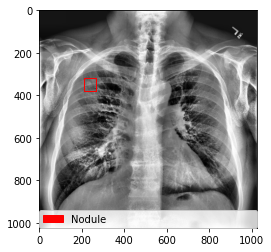

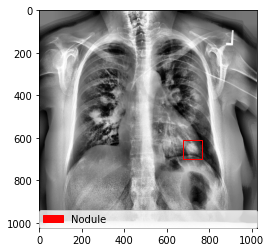

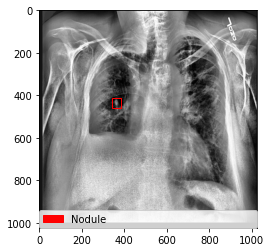

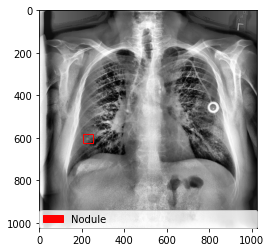

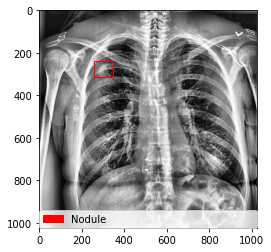

In [51]:
for _i in range(len(bbox_table)):
    # target image
    image_name = bbox_table['Image Index'].iloc[_i]
    # label of the target image
    label = bbox_table[bbox_table['Image Index'] == image_name]
    img = cv2.imread('/home/jeff/data/nih/archive/images/{}'.format(image_name))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # create a CLAHE object (Arguments are optional).
    clahe = cv2.createCLAHE(clipLimit=20.0, tileGridSize=(8,8))
    cl1 = clahe.apply(img)
    
    plt.figure(_i)
    # add label bbox
    plt.imshow(cl1, 'gray')

    ax = plt.gca()

    _patches = []

    # a image might have many labels
    for i in range(len(list(label['y']))):
        rect = patches.Rectangle((list(label['Bbox [x'])[i], list(label['y'])[i]),
                                list(label['w'])[i], list(label['h]'])[i],
                                linewidth=1, edgecolor=label_color[i], fill=False )

        # plot center point of bbox
#         cent = patches.Circle((list(label['Bbox [x'])[i] + list(label['w'])[0]//2,
#                                list(label['y'])[i] + list(label['h]'])[0]//2 ),
#                                 radius = 5, edgecolor=label_color[i], fill=True )

        ax.add_patch(rect)
#         ax.add_patch(cent)

        _patches.append(patches.Patch(color=label_color[i], label=list(label['Finding Label'])[i]))

    plt.legend(handles=_patches, ncol=2, loc='lower left', mode='expand', borderaxespad=0.)

    plt.show()